In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

# Pytorch Workflow

exploring [pytorch](https://pytorch.org)
from udemy course pytoch for Deep Learning Bootcamp

In [3]:
what_is_covered = {1: "data (preparing and loading)",
                   2: "build Model",
                   3: "training model or fitting the model to the data",
                   4: "make predictions and evaluating and a model", 
                   5: "save and load model", 
                   6: "putting it all together"}
what_is_covered

{1: 'data (preparing and loading)',
 2: 'build Model',
 3: 'training model or fitting the model to the data',
 4: 'make predictions and evaluating and a model',
 5: 'save and load model',
 6: 'putting it all together'}

In [4]:
## Neural Network

from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu124'

## 1. Data (preparing and loading)

data can be anything in machine learning

most popular data
* Excel spreadsheet
* Images
* Videos
* Audio
* Text

Machine Learning is a game
1. Get data into a numerical representation.
2. build a model to learn patterns in the numerical rep.

to showcase, lets create the following data using linear regression formula

Y = a + bX

In [5]:
# Create known parameters

weight  = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test set

create a training and test set with our data

In [6]:
# create train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

Visualize data

data explorer motto :
visualize, visualize, visualize


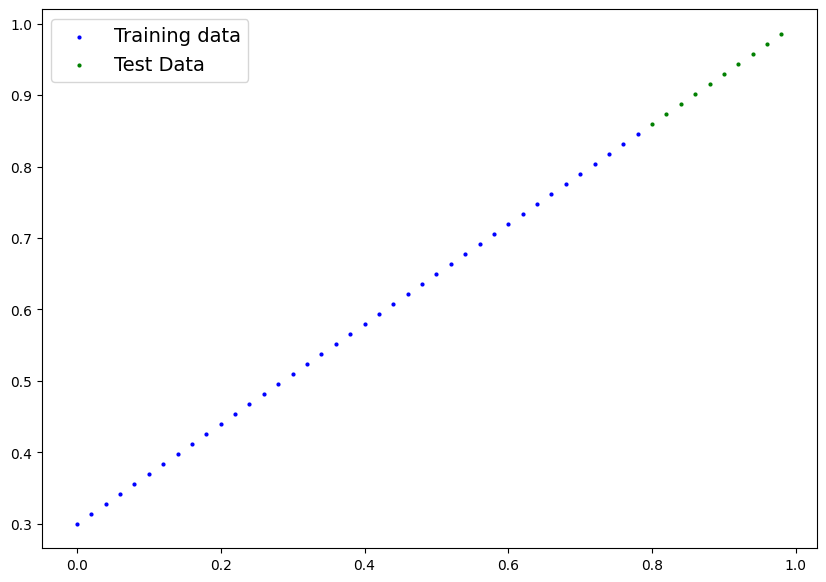

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
    
    # set up plot
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")

    # apakah ada prediksi?
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # show legends
    plt.legend(prop={"size":14})
    plt.show()

plot_predictions()

## 2. Build Model

first pytoch model

what our model does:
* start from random values (weight and bias)
* look at training data and adjust the random values to better represent or get closer to the ideal values

how does it do so?

through two main algorithms:
1. gradient descend
2. backpropagation

In [20]:
# Create a linear reggression model class
import torch.nn as nn

class LinearReggressionModel(nn.Module): # almost everything in Pytorch inherits nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with random values
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, # started with random values
                                            requires_grad=True,
                                            dtype=torch.float))

    # Foward untuk menjelaskan komputasi dalam model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" adalah input data
        return self.weights * x + self.bias

### Pytorch model building essentials

* torch.nn - all of computational neural networks
* torch.nn.parameters - what parameters should our model try and learn, often pytorch layer from torch.nn
* torch.nn.module - the base class for all neural network modules, if you subclass it, you should overwrite foward
* torch.optim - pytorch optimizer, same as optimizer in tensorflow
* def foward - all nn.modules subclasses require to overwrite foward, this defines what happens in the foward computation

### cek model pytorch

lihat isi dari model pytorch ini

bisa cek parameter atau apa isi dari model pake .parameters()

In [21]:
# create random seed
torch.manual_seed(42)

# create instance dari model (subclass nn.module)
model_0 = LinearReggressionModel()


# cek parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
# list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### buat prediksi tanpa training, ini bisa di pytorch tidak di tensorflow

cek predictive power dari model tersebut, prediksi y_test berdasarkan x_test

pass data lewat model kita, lewat method foward

In [23]:
# make prediksi with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [24]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

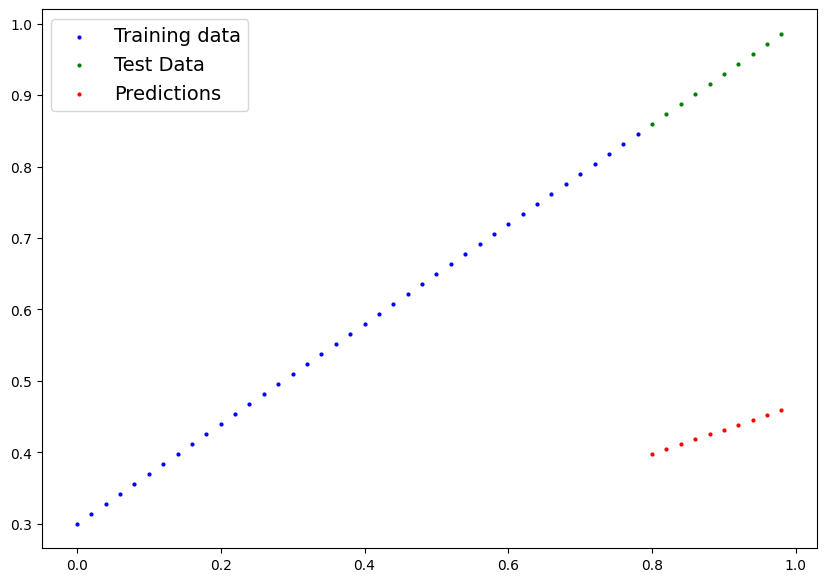

In [25]:
plot_predictions(predictions=y_preds)

hasilnya shocking wkwk